In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
data.target.value_counts(normalize = True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [7]:
data = data.sample(frac = 1)

# Visualization

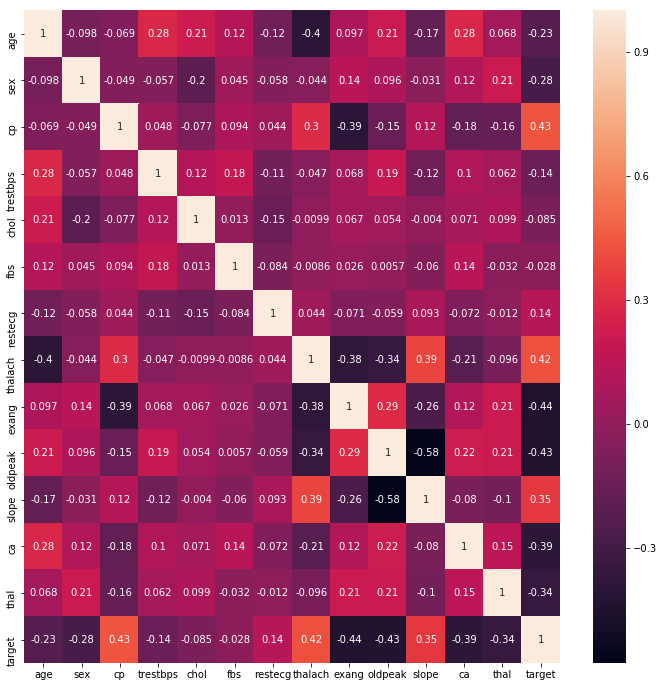

In [8]:
corre = data.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corre, annot = True)

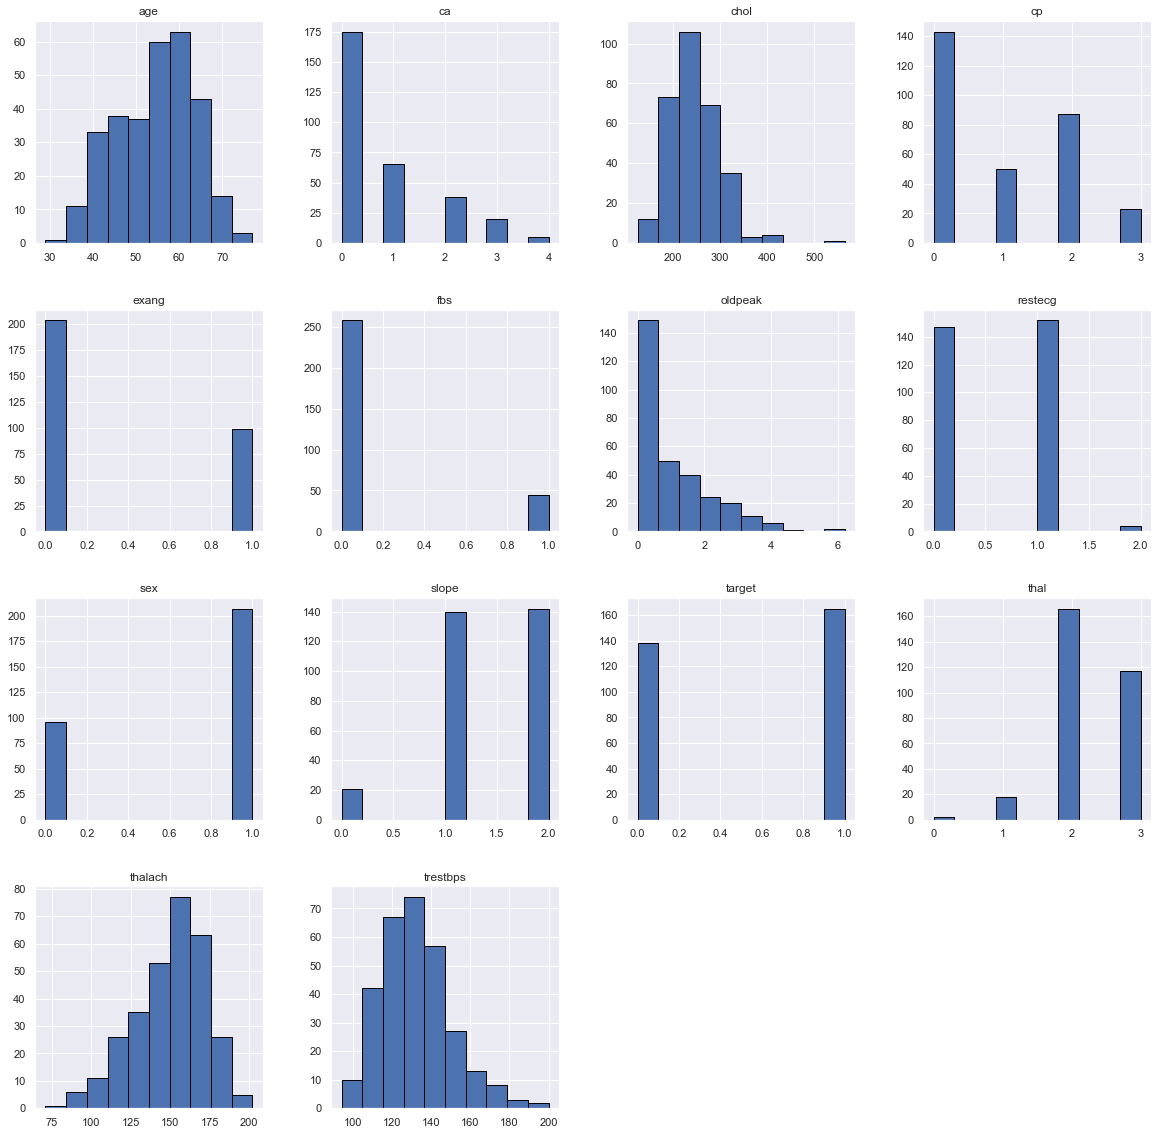

In [9]:
sns.set(style = 'dark')
data.hist(figsize = (20,20), edgecolor = 'black')
plt.show()

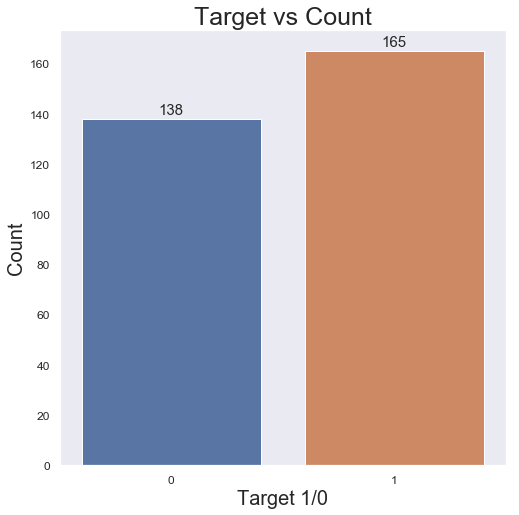

In [10]:
plt.figure(figsize = (8,8))
ax = sns.countplot(data.target)
plt.xlabel("Target 1/0", fontdict={'fontsize':20})
plt.ylabel("Count", fontdict={'fontsize':20})
plt.title("Target vs Count", fontdict={'fontsize':25})
plt.tick_params(labelsize = 12)
for i in ax.patches:
    plt.text(i.get_x() + 0.34, i.get_height() + 2, str(i.get_height()), fontdict={'fontsize':15})

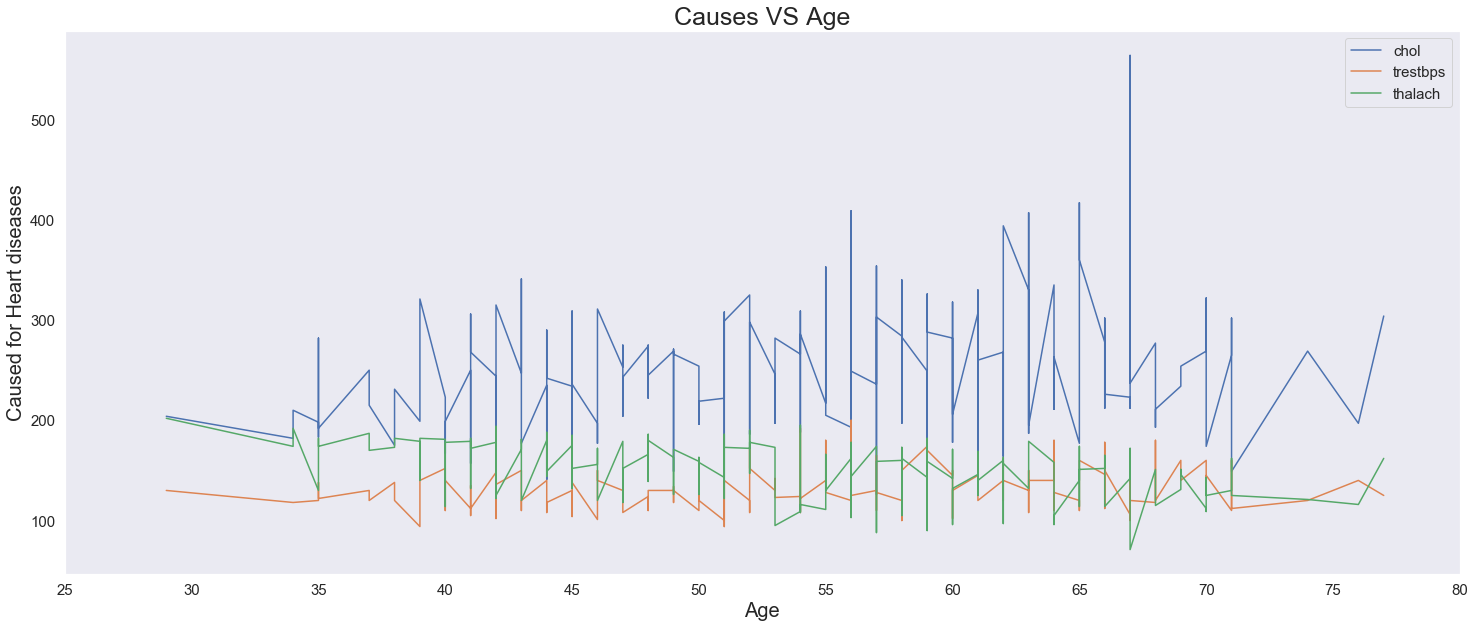

In [11]:
age_target = data[['age', 'trestbps', 'chol', 'thalach']]
age_target = age_target.sort_values(by = 'age')
plt.figure(figsize = (25,10))
plt.plot(age_target['age'], age_target['chol'], label = 'chol')
plt.plot(age_target['age'], age_target['trestbps'], label = 'trestbps')
plt.plot(age_target['age'], age_target['thalach'], label = 'thalach')
plt.tick_params(labelsize = 15)
plt.xlabel('Age', fontdict={'fontsize':20})
plt.ylabel('Caused for Heart diseases', fontdict = {'fontsize':20})
plt.title("Causes VS Age", fontdict = {'fontsize':25})
plt.xticks(range(25,85,5))
plt.legend(fontsize = 15)

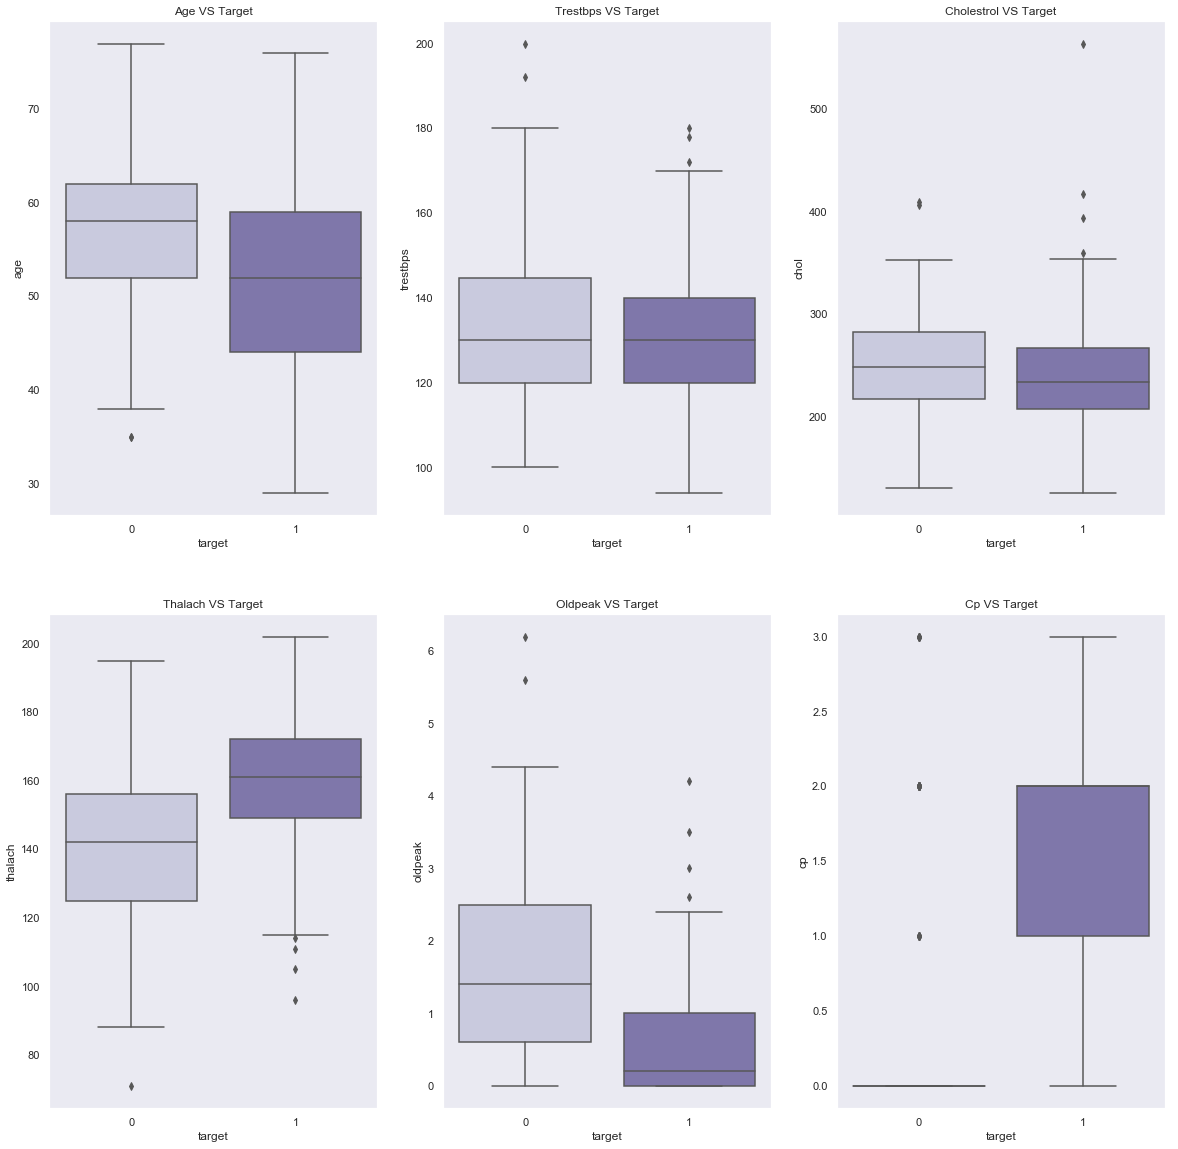

In [12]:
fig , axes= plt.subplots(2,3, sharex = False, sharey = False, figsize = (20,20))
sns.boxplot(x = 'target', y = 'age', data = data, palette = 'Purples',ax = axes[0,0])
axes[0,0].set_title('Age VS Target')
sns.boxplot(x = 'target', y = 'trestbps', data = data, palette = 'Purples',ax = axes[0,1])
axes[0,1].set_title('Trestbps VS Target')
sns.boxplot(x = 'target', y = 'chol', data = data, palette = 'Purples',ax = axes[0,2])
axes[0,2].set_title('Cholestrol VS Target')
sns.boxplot(x = 'target', y = 'thalach', data = data, palette = 'Purples',ax = axes[1,0])
axes[1,0].set_title('Thalach VS Target')
sns.boxplot(x = 'target', y = 'oldpeak', data = data, palette = 'Purples',ax = axes[1,1])
axes[1,1].set_title('Oldpeak VS Target')
sns.boxplot(x = 'target', y = 'cp', data = data, palette = 'Purples',ax = axes[1,2])
axes[1,2].set_title('Cp VS Target')
plt.show()

# Preprocessing

In [13]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 7, test_size = 0.2)

# Model Implementation

In [15]:
lr = LogisticRegression(solver = 'liblinear')
params_lr = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],"penalty": ['l1', 'l2']}
grid_lr = GridSearchCV(lr, param_grid=params_lr, cv = 10, scoring='f1')
grid_lr.fit(X,y)
print('HyperParameter optimization')

HyperParameter optimization


C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [17]:
lr = LogisticRegression(C = 0.1, max_iter= 400, solver = 'liblinear', penalty = 'l2')
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
print("Accuracy Score = {} %".format(lr.score(X_test, y_test)*100))
print('F1 Score = {}'.format(f1_score(y_test, predict_lr)))
print(classification_report(y_test, predict_lr))

Accuracy Score = 85.24590163934425 %
F1 Score = 0.883116883116883
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [18]:
# Model 2

In [19]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors':list(range(1,10)), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':list(range(20,40))}
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv = 10, scoring='f1')
grid_knn.fit(X,y)
print('HyperParameter optimization')

HyperParameter optimization


C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7}

In [21]:
knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, n_neighbors = 5)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
print("Accuracy Score = {} %".format(knn.score(X_test, y_test)*100))
print('F1 Score = {}'.format(f1_score(y_test, predict_knn)))
print(classification_report(y_test, predict_knn))

Accuracy Score = 65.57377049180327 %
F1 Score = 0.7199999999999999
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        25
           1       0.69      0.75      0.72        36

   micro avg       0.66      0.66      0.66        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.65      0.66      0.65        61



In [22]:
rf = RandomForestClassifier()
params_rf = {'n_estimators':list(range(1,20)), 'max_depth':list(range(1,10)), 'criterion':['gini', 'entropy']}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv = 10, scoring='f1')
grid_rf.fit(X,y)
print('HyperParameter optimization')

HyperParameter optimization


C:\Users\kjkr3\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 19}

In [24]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, n_estimators = 13)
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)
print("Accuracy Score = {} %".format(rf.score(X_test, y_test)*100))
print('F1 Score = {}'.format(f1_score(y_test, predict_rf)))
print(classification_report(y_test, predict_rf))

Accuracy Score = 88.52459016393442 %
F1 Score = 0.9090909090909091
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

   micro avg       0.89      0.89      0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61

